In [1]:
#importing Libraries
import pandas as pd
import numpy as np
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as si
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale 
from collections import Counter

In [2]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weatherFall.csv').set_index('date')

In [3]:
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,maxdewptm,mindewptm,meanpressurem,maxpressurem,minpressurem,precipm,windspeed
date,,,,,,,,,,,,,,,
01-08-18,29.0,31,27,30,83%,86%,80%,85%,20,19,997.5 mbr,998 mbar,997 mbar,360mm,2 mph
02-08-18,28.5,30,27,29,88%,90%,86%,87%,19,18,1000.5,1001,1000,355mm,1.864 mph
03-08-18,28.5,31,26,29,83%,93%,73%,82%,24,23,999.5,1001,998,370mm,4 mph
04-08-18,27.0,31,27,29,88.50%,93%,84%,88%,20,18,999,1000,998,350mm,0 mph
05-08-18,29.5,31,28,28,88.50%,93%,84%,87%,21,19,999,1000,998,352mm,.621 mph


In [4]:
df.describe()

,meantempm,MaxTemp,MinTemp,meantempm_1,maxdewptm,mindewptm
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,28.204918,30.991803,24.991803,28.565574,28.000000,24.172131
std,3.669032,2.800519,3.385667,3.728354,5.469676,4.754628
min,21.000000,23.000000,18.000000,22.000000,15.000000,13.000000
25%,25.500000,29.000000,22.250000,26.000000,24.250000,21.000000
50%,29.000000,32.000000,26.000000,29.000000,27.000000,23.000000
75%,30.500000,33.000000,28.000000,30.000000,32.000000,27.000000
max,54.000000,36.000000,31.000000,55.000000,40.000000,38.000000


In [5]:
df.info

<bound method DataFrame.info of           meantempm  MaxTemp  MinTemp  meantempm_1 meanhumidity maxhumidity  \
date                                                                          
01-08-18       29.0       31       27           30          83%         86%   
02-08-18       28.5       30       27           29          88%         90%   
03-08-18       28.5       31       26           29          83%         93%   
04-08-18       27.0       31       27           29       88.50%         93%   
05-08-18       29.5       31       28           28       88.50%         93%   
06-08-18       30.0       34       26           31          81%         94%   
07-08-18       30.0       33       27           29          74%         92%   
08-08-18       31.5       32       31           31       61.50%         62%   
09-08-18       29.5       31       28           29          82%         92%   
10-08-18       31.0       34       28           30       69.50%         82%   
11-08-18       31.0 

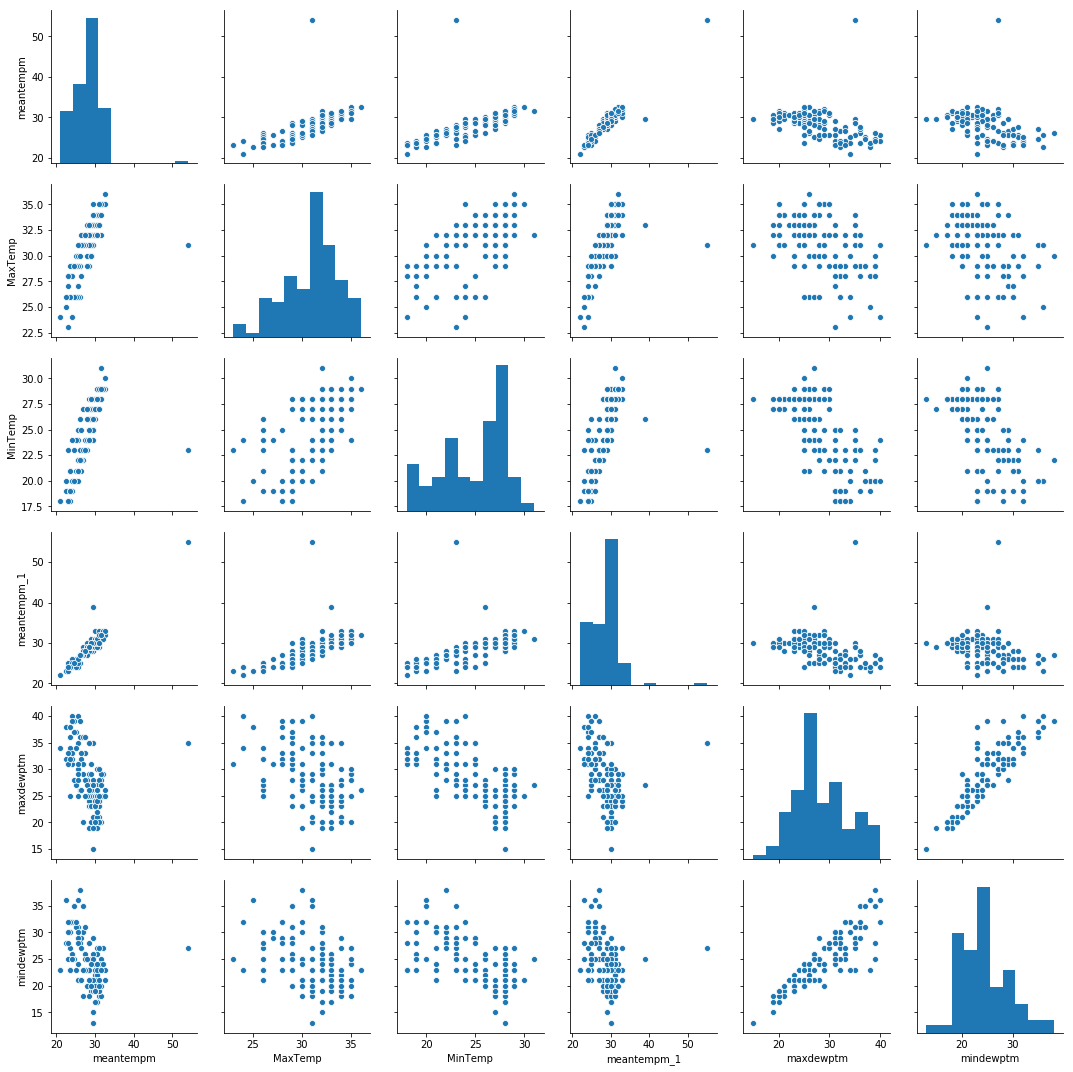

In [6]:
si.pairplot(df)

In [8]:
df.shape

(122, 15)

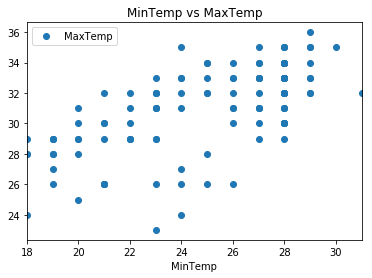

In [9]:
df.plot(x='MinTemp',y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel=('MinTemp')
plt.ylabel=('MaxTemp')
plt.show()

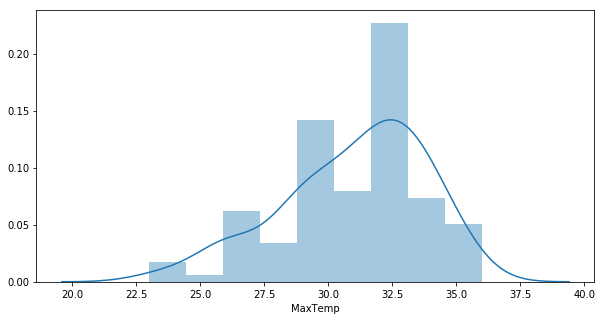

In [10]:
plt.figure(figsize=(10,5))
plt.tight_layout
si.distplot (df['MaxTemp'])

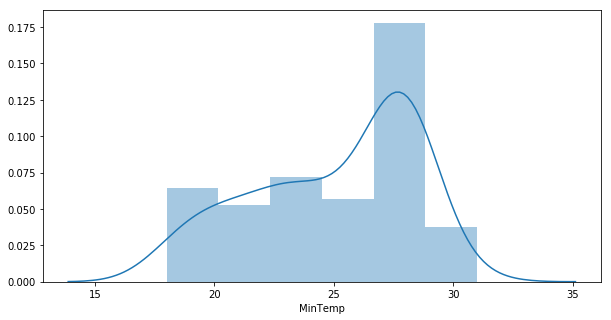

In [11]:
plt.figure(figsize=(10,5))
plt.tight_layout
si.distplot (df['MinTemp'])

In [12]:
X= df['MinTemp'].values.reshape(-1,1)
Y= df['MaxTemp'].values.reshape(-1,1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, random_state=0)

In [14]:
regression_model =LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print("Intercept:", regression_model.intercept_ )
print ("Slope:", regression_model.coef_)

Intercept: [16.93947738]
Slope: [[0.55961757]]


In [16]:
#prediction
predict= regression_model.predict(x_test)
df_predict= pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predict.flatten()})
df_predict

,Actual,Predicted
0,32,29.251064
1,32,29.810681
2,34,32.608769
3,27,30.370299
4,31,32.608769
5,33,31.489534
6,29,32.608769
7,32,34.287622
8,33,32.608769
9,29,29.251064


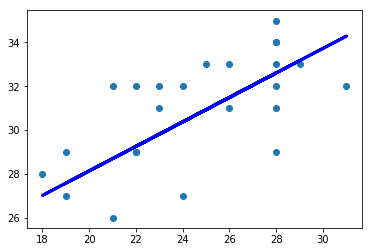

In [18]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predict, color='blue', linewidth='3')
plt.xlabel=('MinTemp')
plt.ylabel=('MaxTemp')
plt.show()

In [19]:
print("RMS ERROR IN THE PREDICTED WEATHER:" ,np.sqrt(metrics.mean_squared_error(y_test,predict)))

RMS ERROR IN THE PREDICTED WEATHER: 1.88853459362606
